<a href="https://colab.research.google.com/github/ihatestudysomuch/pytorch/blob/main/Pytorch_8%EC%9E%A5_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀 예제(Logistic Regresstion example)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np

loaded_data = np.loadtxt('/content/drive/MyDrive/pytorch/PyTorch/diabetes.csv', delimiter = ',')

x_train_np = loaded_data[:, 0:-1]
y_train_np = loaded_data[:, [-1]]

print(loaded_data.shape)
print(x_train_np.shape)
print(y_train_np.shape)


(759, 9)
(759, 8)
(759, 1)


## 데이터 생성

In [14]:
import torch
from torch import nn
from torch import optim

x_train = torch.Tensor(x_train_np)
y_train = torch.Tensor(y_train_np)

'''
print(x_train)
print(y_train)
'''

'\nprint(x_train)\nprint(y_train)\n'

## 모델

In [15]:
class MyLogisticRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.logistic_stack = nn.Sequential(
        nn.Linear(8, 1), # X * W + b 수행
        nn.Sigmoid() # sigmooid 수행
    )

  # 피드 포워드
  def forward(self, data):
    return self.logistic_stack(data)

In [10]:
model = MyLogisticRegressionModel()

for p in model.parameters():
  print(p) # W, b 확인, 다시 말하지만 W는 목표에 다가가도록 하고 b는 0에 수렴하도록 해야함


Parameter containing:
tensor([[-0.0890, -0.0328, -0.0279,  0.1437, -0.2543,  0.2127,  0.0419,  0.1483]],
       requires_grad=True)
Parameter containing:
tensor([0.3391], requires_grad=True)


실행 결과로 W, b 확인

## 손실함수 및 옵티마이저

In [17]:
loss_function = nn.BCELoss() # Logistic Regression, Binary Cross Entropy를 손실함수로 사용
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # 경사하강법의 옵티마이저


In [27]:
train_loss_list = []
train_accuracy_list = []

# 5000번의 학습
for epoch in range(5001):
  outputs = model(x_train) # 예측값, forward() 자동 호출
  loss = loss_function(outputs, y_train) # 예측값과 정답값의 차이인 오차 계산

  train_loss_list.append(loss.item())

  prediction = outputs > 0.5 # 예측값 True if output > 0.5  else Flase
  correct = (prediction.float() == y_train)
  accuracy = prediction.sum().item() / len(correct)

  train_accuracy_list.append(accuracy)

  # 역전파 W, b 최적화
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch == ', epoch, 'Loss == ', loss.item(), 'accuracy == ', accuracy )

Epoch ==  0 Loss ==  0.47317996621131897 accuracy ==  0.7364953886693018
Epoch ==  100 Loss ==  0.4731660783290863 accuracy ==  0.7364953886693018
Epoch ==  200 Loss ==  0.4731524586677551 accuracy ==  0.7364953886693018
Epoch ==  300 Loss ==  0.4731389880180359 accuracy ==  0.7364953886693018
Epoch ==  400 Loss ==  0.4731256067752838 accuracy ==  0.7364953886693018
Epoch ==  500 Loss ==  0.47311240434646606 accuracy ==  0.7364953886693018
Epoch ==  600 Loss ==  0.47309938073158264 accuracy ==  0.7364953886693018
Epoch ==  700 Loss ==  0.47308647632598877 accuracy ==  0.7364953886693018
Epoch ==  800 Loss ==  0.47307372093200684 accuracy ==  0.7364953886693018
Epoch ==  900 Loss ==  0.47306111454963684 accuracy ==  0.7364953886693018
Epoch ==  1000 Loss ==  0.47304868698120117 accuracy ==  0.7364953886693018
Epoch ==  1100 Loss ==  0.4730362892150879 accuracy ==  0.7364953886693018
Epoch ==  1200 Loss ==  0.4730241894721985 accuracy ==  0.7364953886693018
Epoch ==  1300 Loss ==  0.4730

In [28]:
# W, b
for name, child in model.named_children():
    for param in child.parameters():
        print(name, param)

logistic_stack Parameter containing:
tensor([[-0.8838, -3.4826,  0.0635, -0.5948, -0.3259, -2.1603, -0.9899, -0.0395]],
       requires_grad=True)
logistic_stack Parameter containing:
tensor([0.2140], requires_grad=True)


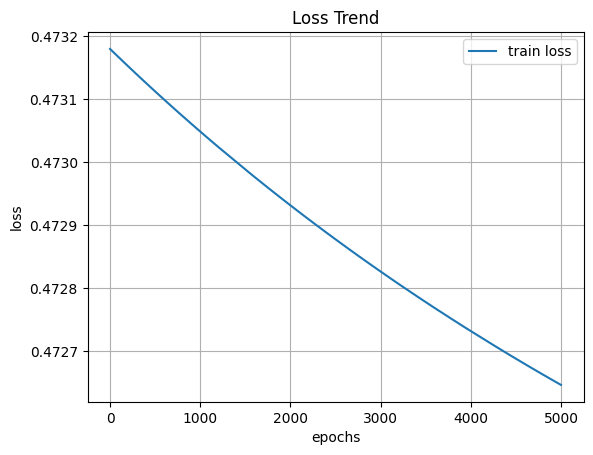

In [29]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(train_loss_list, label='train loss')
plt.legend(loc='best')

plt.show()

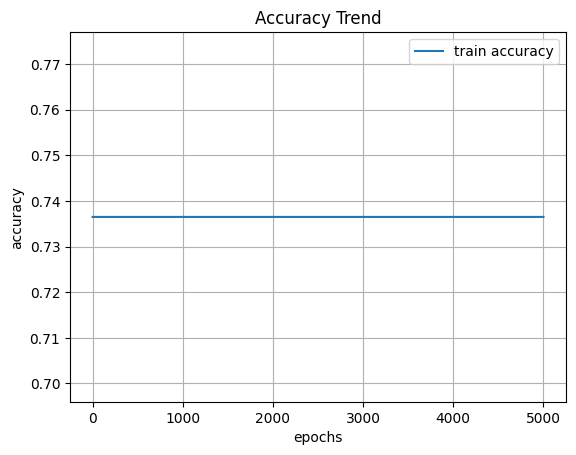

In [30]:
import matplotlib.pyplot as plt

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(train_accuracy_list, label='train accuracy')
plt.legend(loc='best')

plt.show()

너무 많이 실행해서 그래프가 이상해져버럼